# **ESSAY BINARY**

## **Preliminary steps**

In [1]:
import os 
print(os.getcwd())
os.chdir('ml-for-nlp')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project 
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [2]:
### PACKAGES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

In [3]:
from src.configs import constants, ml_config, names

In [4]:
from src.libs import preprocessing

In [ ]:
### FUNCTIONS

from src.configs import constants, ml_config, names
from src.libs import preprocessing, evaluation, visualization
from src.embedding.tf_idf import TfIdfEmbedding
from src.embedding.punctuation import PunctuationEmbedding
from src.classifier.classifier import RFClassifier, NBClassifier #LightGBMClassifier

: 

: 

: 

: 

## **DATA**

In [3]:
### LOAD DATA

df_poetry_gpt = preprocessing.load_dataset(source="GPT", type="POETRY")
df_poetry_bard = preprocessing.load_dataset(source="BARD", type="POETRY")
df_poetry_human = preprocessing.load_dataset(source="Human", type="POETRY")

df_essay_gpt = preprocessing.load_dataset(source="GPT", type="ESSAY")
df_essay_bard = preprocessing.load_dataset(source="BARD", type="ESSAY")
df_essay_human = preprocessing.load_dataset(source="Human", type="ESSAY")

df_story_gpt = preprocessing.load_dataset(source="GPT", type="STORY")
df_story_bard = preprocessing.load_dataset(source="BARD", type="STORY")
df_story_human = preprocessing.load_dataset(source="Human", type="STORY")

Time taken to load dataset: 0.01950216293334961 seconds
Time taken to load dataset: 0.009342670440673828 seconds
Time taken to load dataset: 0.35179662704467773 seconds
Time taken to load dataset: 0.012064695358276367 seconds
Time taken to load dataset: 0.0060999393463134766 seconds
Time taken to load dataset: 0.09985542297363281 seconds
Time taken to load dataset: 0.013469219207763672 seconds
Time taken to load dataset: 0.016266345977783203 seconds
Time taken to load dataset: 0.010236263275146484 seconds


In [4]:
### GET TRAIN SPLIT

df_train_poetry_gpt, df_test_poetry_gpt = preprocessing.train_valid_split(df_poetry_gpt)
df_train_poetry_bard, df_test_poetry_bard = preprocessing.train_valid_split(
    df_poetry_bard
)
df_train_poetry_human, df_test_poetry_human = preprocessing.train_valid_split(
    df_poetry_human
)

df_train_essay_gpt, df_test_essay_gpt = preprocessing.train_valid_split(df_essay_gpt)
df_train_essay_bard, df_test_essay_bard = preprocessing.train_valid_split(df_essay_bard)
df_train_essay_human, df_test_essay_human = preprocessing.train_valid_split(
    df_essay_human
)

df_train_story_gpt, df_test_story_gpt = preprocessing.train_valid_split(df_story_gpt)
df_train_story_bard, df_test_story_bard = preprocessing.train_valid_split(df_story_bard)
df_train_story_human, df_test_story_human = preprocessing.train_valid_split(
    df_story_human
)

In [5]:
### GET FULL DATASETS

df_train_essay = preprocessing.group_llms(
    preprocessing.get_essay_dataset(
        df_train_essay_gpt,
        df_train_essay_bard,
        df_train_essay_human,
        samples_per_source=min(
            len(df_train_essay_gpt),
            len(df_train_essay_bard),
            len(df_train_essay_human),
        ),
    )
)
df_test_essay = preprocessing.group_llms(
    preprocessing.get_essay_dataset(
        df_test_essay_gpt,
        df_test_essay_bard,
        df_test_essay_human,
        samples_per_source=None,
    )
)

df_test_poetry = preprocessing.group_llms(
    preprocessing.get_poetry_dataset(
        df_test_poetry_gpt,
        df_test_poetry_bard,
        df_test_poetry_human,
        samples_per_source=None,
    )
)

df_test_story = preprocessing.group_llms(
    preprocessing.get_story_dataset(
        df_test_story_gpt,
        df_test_story_bard,
        df_test_story_human,
        samples_per_source=None,
    )
)

In [6]:
### SPLIT FEATURES AND LABELS

X_train_essay, y_train_essay = preprocessing.split_features_and_labels(df_train_essay)
X_test_essay, y_test_essay = preprocessing.split_features_and_labels(df_test_essay)
X_test_poetry, y_test_poetry = preprocessing.split_features_and_labels(df_test_poetry)
X_test_story, y_test_story = preprocessing.split_features_and_labels(df_test_story)

## **CLASSIFICATION USING PUNCTUATION & RANDOM FOREST**

In [7]:
ID_EXPERIMENT = 211

In [8]:
### EMBEDDING

embedding_211 = PunctuationEmbedding(ID_EXPERIMENT)

X_train_essay_211 = embedding_211.transform(X=X_train_essay)
X_test_essay_211 = embedding_211.transform(X=X_test_essay)
X_test_poetry_211 = embedding_211.transform(X=X_test_poetry)
X_test_story_211 = embedding_211.transform(X=X_test_story)

In [9]:
### CLASSIFIER

classifier_211 = LightGBMClassifier(ID_EXPERIMENT)

classifier_211.train(X_train=X_train_essay_211, y_train=y_train_essay)

metrics_essay_211 = classifier_211.evaluate(X_test_essay_211, y_test_essay)
metrics_poetry_211 = classifier_211.evaluate(X_test_poetry_211, y_test_poetry)
metrics_story_211 = classifier_211.evaluate(X_test_story_211, y_test_story)

print(f"Metrics on essay: {metrics_essay_211}")
print(f"Metrics on poetry: {metrics_poetry_211}")
print(f"Metrics on story: {metrics_story_211}")

Metrics on essay: {'accuracy': 0.7232472324723247, 'precision': 0.5987789987789988, 'recall': 0.7729419703103914, 'f1': 0.5860910294267386}
Metrics on poetry: {'accuracy': 0.6008522727272727, 'precision': 0.4843459405719967, 'recall': 0.3232704402515723, 'f1': 0.3769950745121751}
Metrics on story: {'accuracy': 0.7636363636363637, 'precision': 0.7272727272727273, 'recall': 0.775, 'f1': 0.7352832284339134}


In [10]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_211 = embedding_211.map_dimensions_to_names()
feature_importances_211 = classifier_211.get_feature_importance()
most_important_features_211 = np.argsort(feature_importances_211)[-10:][::-1]
for i in most_important_features_211:
    print(f"{dim_names_211[i]}: {feature_importances_211[i]}")

ratio_words_per_sentence: 821
ratio_punctuations: 617
ratio_odd_characters: 600


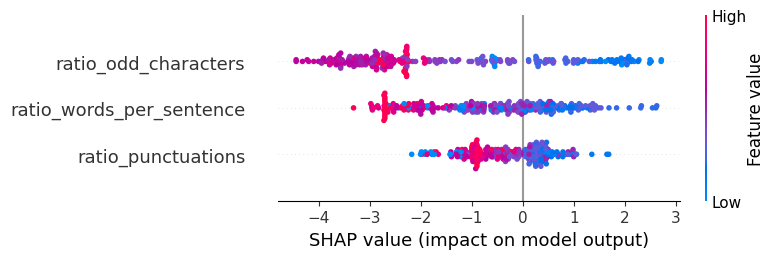

In [11]:
### INTERPRETABILITY - SHAP VALUES

explainer_211 = shap.Explainer(classifier_211.classifier)

if hasattr(X_test_essay_211, "toarray"):
    X_test_essay_211 = X_test_essay_211.toarray()

# Calculate SHAP values
shap_values_211 = explainer_211(X_test_essay_211)

# Visualize the SHAP values
shap.summary_plot(shap_values_211, X_test_essay_211, feature_names=dim_names_211)

## **CLASSIFICATION USING TF-IDF & LGBM**

In [12]:
ID_EXPERIMENT = 111

In [13]:
### EMBEDDING

embedding_111 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_111.fit(X=X_train_essay)

X_train_essay_111 = embedding_111.transform(X=X_train_essay)
X_test_essay_111 = embedding_111.transform(X=X_test_essay)
X_test_poetry_111 = embedding_111.transform(X=X_test_poetry)
X_test_story_111 = embedding_111.transform(X=X_test_story)

In [14]:
### CLASSIFIER

classifier_111 = LightGBMClassifier(ID_EXPERIMENT)

classifier_111.train(X_train=X_train_essay_111, y_train=y_train_essay)

metrics_essay_111 = classifier_111.evaluate(X_test_essay_111, y_test_essay)
metrics_poetry_111 = classifier_111.evaluate(X_test_poetry_111, y_test_poetry)
metrics_story_111 = classifier_111.evaluate(X_test_story_111, y_test_story)

print(f"Metrics on essay: {metrics_essay_111}")
print(f"Metrics on poetry: {metrics_poetry_111}")
print(f"Metrics on story: {metrics_story_111}")

Metrics on essay: {'accuracy': 0.955719557195572, 'precision': 0.8361255894762969, 'recall': 0.9568994601889339, 'f1': 0.884155029923055}
Metrics on poetry: {'accuracy': 0.08664772727272728, 'precision': 0.5113981762917933, 'recall': 0.5333817126269956, 'f1': 0.08487329552920723}
Metrics on story: {'accuracy': 0.7090909090909091, 'precision': 0.6136363636363636, 'recall': 0.5916666666666667, 'f1': 0.5970695970695971}


In [15]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_111 = embedding_111.map_dimensions_to_names()
feature_importances_111 = classifier_111.get_feature_importance()
most_important_features_111 = np.argsort(feature_importances_111)[-10:][::-1]
for i in most_important_features_111:
    print(f"{dim_names_111[i]}: {feature_importances_111[i]}")

like: 144
just: 120
really: 117
try: 107
going: 101
don: 54
oh: 42
guess: 39
day: 37
know: 37


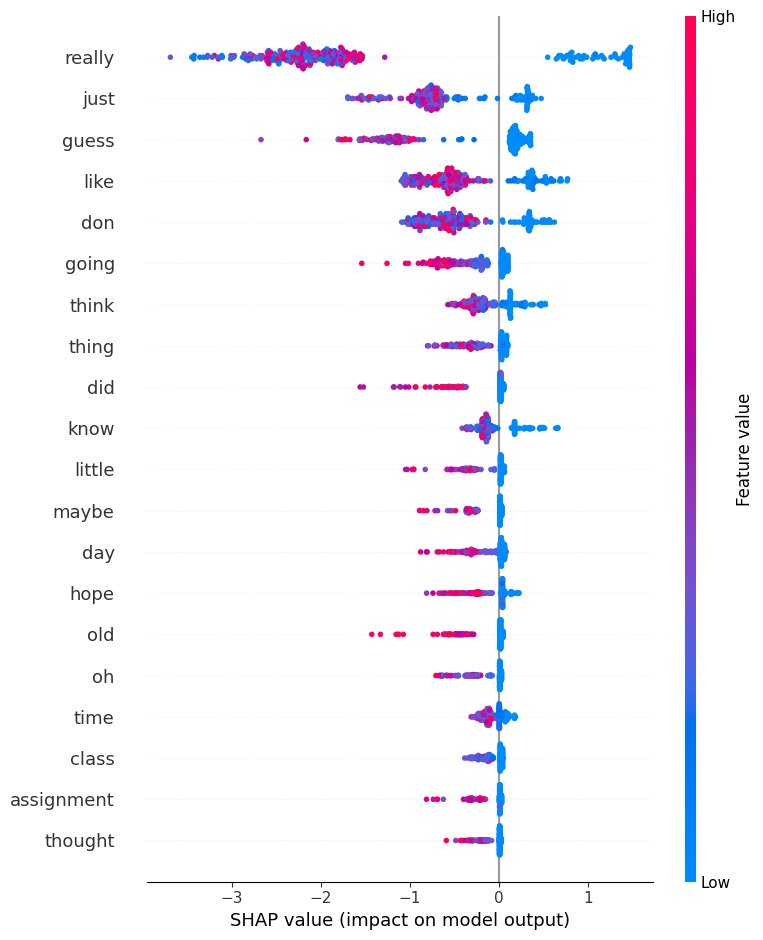

In [16]:
### INTERPRETABILITY - SHAP VALUES

explainer_111 = shap.Explainer(classifier_111.classifier)

if hasattr(X_test_essay_111, "toarray"):
    X_test_essay_111 = X_test_essay_111.toarray()

# Calculate SHAP values
shap_values_111 = explainer_111(X_test_essay_111)


# Visualize the SHAP values
shap.summary_plot(shap_values_111, X_test_essay_111, feature_names=dim_names_111)

## **CLASSIFICATION USING TF-IDF & RANDOM FOREST**

In [17]:
ID_EXPERIMENT = 121

In [18]:
### EMBEDDING

embedding_121 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_121.fit(X=X_train_essay)

X_train_essay_121 = embedding_121.transform(X=X_train_essay)
X_test_essay_121 = embedding_121.transform(X=X_test_essay)
X_test_poetry_121 = embedding_121.transform(X=X_test_poetry)
X_test_story_121 = embedding_121.transform(X=X_test_story)

In [19]:
### CLASSIFIER

classifier_121 = RFClassifier(ID_EXPERIMENT)

classifier_121.train(X_train=X_train_essay_121, y_train=y_train_essay)

metrics_essay_121 = classifier_121.evaluate(X_test_essay_121, y_test_essay)
metrics_poetry_121 = classifier_121.evaluate(X_test_poetry_121, y_test_poetry)
metrics_story_121 = classifier_121.evaluate(X_test_story_121, y_test_story)

print(f"Metrics on essay: {metrics_essay_121}")
print(f"Metrics on poetry: {metrics_poetry_121}")
print(f"Metrics on story: {metrics_story_121}")

Metrics on essay: {'accuracy': 0.974169741697417, 'precision': 0.8944856084354518, 'recall': 0.9670209176788125, 'f1': 0.9268047999382645}
Metrics on poetry: {'accuracy': 0.08238636363636363, 'precision': 0.5113464447806354, 'recall': 0.5312046444121916, 'f1': 0.08093251851133314}
Metrics on story: {'accuracy': 0.7818181818181819, 'precision': 0.7243589743589745, 'recall': 0.7041666666666666, 'f1': 0.7125435540069687}


## **CLASSIFICATION USING TF-IDF & NAIVE BAYES**

In [20]:
ID_EXPERIMENT = 131

In [21]:
### EMBEDDING

embedding_131 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_131.fit(X=X_train_essay)

X_train_essay_131 = embedding_131.transform(X=X_train_essay)
X_test_essay_131 = embedding_131.transform(X=X_test_essay)
X_test_poetry_131 = embedding_131.transform(X=X_test_poetry)
X_test_story_131 = embedding_131.transform(X=X_test_story)

In [22]:
### CLASSIFIER

classifier_131 = NBClassifier(ID_EXPERIMENT)

classifier_131.train(X_train=X_train_essay_131, y_train=y_train_essay)

metrics_essay_131 = classifier_131.evaluate(X_test_essay_131, y_test_essay)
metrics_poetry_131 = classifier_131.evaluate(X_test_poetry_131, y_test_poetry)
metrics_story_131 = classifier_131.evaluate(X_test_story_131, y_test_story)

print(f"Metrics on essay: {metrics_essay_131}")
print(f"Metrics on poetry: {metrics_poetry_131}")
print(f"Metrics on story: {metrics_story_131}")

Metrics on essay: {'accuracy': 0.9520295202952029, 'precision': 0.8243243243243243, 'recall': 0.9736842105263157, 'f1': 0.8799291094373062}
Metrics on poetry: {'accuracy': 0.15553977272727273, 'precision': 0.5123051681706317, 'recall': 0.568577648766328, 'f1': 0.14463185098174264}
Metrics on story: {'accuracy': 0.6909090909090909, 'precision': 0.6276276276276276, 'recall': 0.6416666666666666, 'f1': 0.6320346320346321}
